**Introduction :**
<p>The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The goal is to predict if the client will subscribe a term deposit ?.</p>

**Understanding the dataset :**
<p>
1.Client-Related Features<br>
- age: Older or younger clients might respond differently.<br>
- job: Certain professions may be more likely to invest.<br>
- marital: Marital status might influence financial decisions.<br>
- education: Higher education levels could correlate with a better understanding of investments.<br>
    
2.Financial Information<br>
- default: Whether the client has credit in default may affect their likelihood of subscribing.<br>
- housing: Owning a house might indicate financial stability.<br>
- loan: Clients with personal loans may be less likely to invest in term deposits.<br>

3.Campaign-Related Features<br>
- contact: The type of contact (e.g., telephone) can affect engagement.<br>
- month: Seasonality might impact client behavior.<br>
- day_of_week: Some days may have higher conversion rates.<br>
- campaign: The number of contacts performed during the campaign could affect the decision.<br>

4.Past Campaign Results<br>
- pdays: Number of days since last contact (-1 or 999 means no previous contact).<br>
- previous: Number of times contacted before.<br>
- poutcome: Outcome of the previous campaign (success, failure, nonexistent).<br>

5.Macro-Economic Indicators<br>
- emp.var.rate: Employment variation rate, which affects financial decisions.<br>
- cons.price.idx: Consumer price index, affecting economic conditions.<br>
- cons.conf.idx: Consumer confidence index, indicating economic sentiment.<br>
- euribor3m: 3-month Euro Interbank Offered Rate, influencing financial markets.<br>
- nr.employed: Number of employees in the economy, affecting job stability.<br>
</p>

In [1]:
# for data manuplation we use pandas library
# for data visualization matplotlib and seaborn library is used
# sklearn is a machine learning library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report,accuracy_score,f1_score,recall_score,precision_score,confusion_matrix
import warnings
warnings.filterwarnings("ignore")


In [2]:
# read_csv() is a pandas function to read the data 
# delimiter is separator that is used to separate columns
data=pd.read_csv('bank-additional-full.csv',delimiter=';')

In [3]:
# data is converted into DataFrame 
# DataFrame is nothing but the table with rows and columns
df=pd.DataFrame(data)

In [4]:
# head() is a pandas function to get the top 5 records from the table
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
# columns is a method to return the column names 
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [6]:
# describe is a method in pandas returns overview of the data
print(df.describe)

<bound method NDFrame.describe of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact 

In [7]:
import numpy as np
df = df.replace('unknown', np.nan)

In [8]:
df = df.dropna()

In [9]:
# column 'y' contains string value which is yes/no so convert it in numeric 1/0
df['y']=df['y'].map({'yes':1,'no':0})

In [10]:
# all columns except 'y' which is target is assigned to X
# X and y are nothing but the variables
X = df.drop('y', axis=1)

In [11]:
# target column is assigned to y
y=df['y']

**Using Class Distribution Technique :**
<p>
    Before training the model to check data is balanced or imbalanced this technique is used
</p>

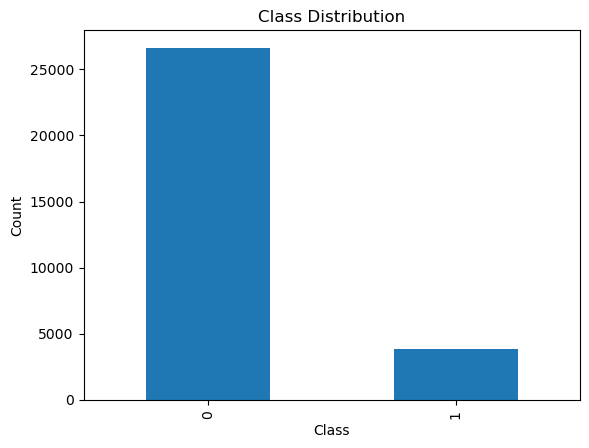

In [12]:
# to check the data is balanced or imbalanced 
import matplotlib.pyplot as plt

df['y'].value_counts().plot(kind='bar')
plt.title("Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()


> most of the data belongs to class 0 that means the dataset is imbalanced

In [13]:
# to get the top 5 records of X
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0


In [14]:
# to get top 5 records of y
y.head()

0    0
2    0
3    0
4    0
6    0
Name: y, dtype: int64

Label Encoding is used to convert categorical columns into numerical columns <br>
It assigns a unique integer to each category.

In [15]:
from sklearn.preprocessing import LabelEncoder

In [16]:
le = LabelEncoder()

In [17]:
# for loop is used to iterate in the list and perform label enconding to each column in the list
for col in ['marital', 'default', 'contact', 'month', 'day_of_week', 'poutcome']:
    df[col] = le.fit_transform(df[col])
print(df)

       age          job  marital            education  default housing loan  \
0       56    housemaid        1             basic.4y        0      no   no   
2       37     services        1          high.school        0     yes   no   
3       40       admin.        1             basic.6y        0      no   no   
4       56     services        1          high.school        0      no  yes   
6       59       admin.        1  professional.course        0      no   no   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired        1  professional.course        0     yes   no   
41184   46  blue-collar        1  professional.course        0      no   no   
41185   56      retired        1    university.degree        0     yes   no   
41186   44   technician        1  professional.course        0      no   no   
41187   74      retired        1  professional.course        0     yes   no   

       contact  month  day_of_week  ...  campaign  

In [18]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,1,basic.4y,0,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
2,37,services,1,high.school,0,yes,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
3,40,admin.,1,basic.6y,0,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
4,56,services,1,high.school,0,no,yes,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0
6,59,admin.,1,professional.course,0,no,no,1,6,1,...,1,999,0,1,1.1,93.994,-36.4,4.857,5191.0,0


**Bivariate Analysis**
<p>
    to check relationship between two variables
</p>

<p>
    If one variable is categorical and one is numerical then we use T-test & boxplots <br>
    T-test - checks means are different
    
</p>

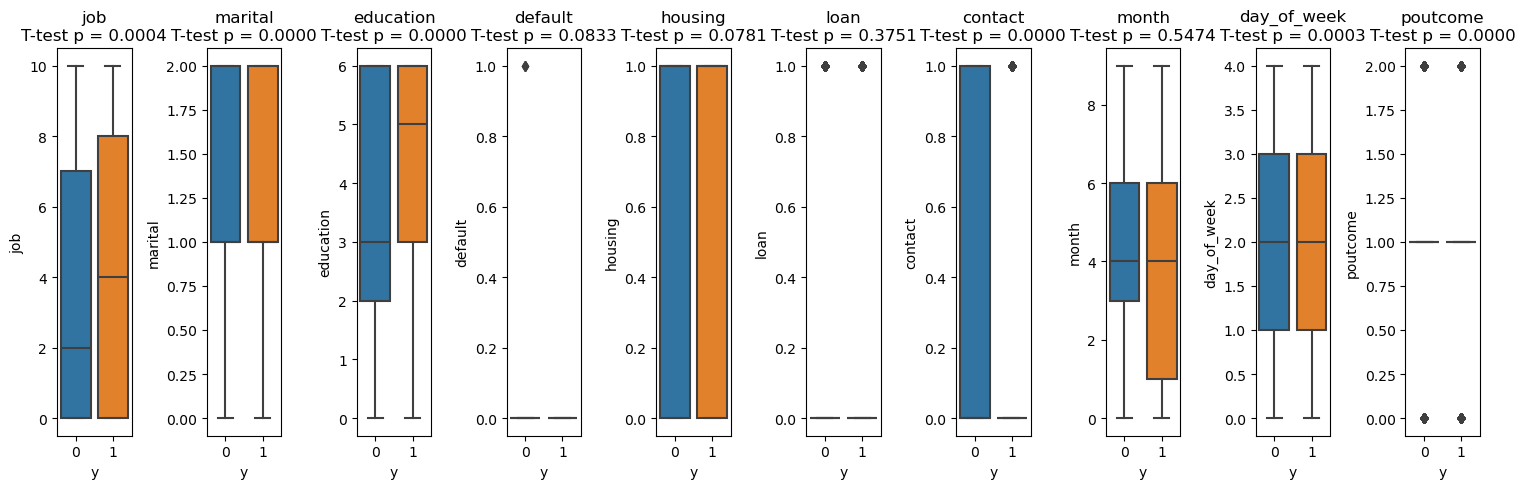

T-test Results (p-values):
job: p-value = 0.000364
marital: p-value = 0.000000
education: p-value = 0.000000
default: p-value = 0.083265
housing: p-value = 0.078110
loan: p-value = 0.375063
contact: p-value = 0.000000
month: p-value = 0.547397
day_of_week: p-value = 0.000305
poutcome: p-value = 0.000000


In [21]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for feature in features:
    df[feature] = encoder.fit_transform(df[feature])

from scipy.stats import ttest_ind
import matplotlib.pyplot as plt
import seaborn as sns

# dictionary to store T-test results
t_test_results = {}

# create subplots for multiple boxplots
fig, axes = plt.subplots(1, len(features), figsize=(15, 5))

# iterate through each feature
for i, feature in enumerate(features):
    group1 = df[df['y'] == 0][feature]
    group2 = df[df['y'] == 1][feature]
    
    # Perform Welch's T-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)
    
    # Store results
    t_test_results[feature] = p_value
    
    # Boxplot
    sns.boxplot(x=df['y'], y=df[feature], ax=axes[i])
    axes[i].set_title(f'{feature}\nT-test p = {p_value:.4f}')

plt.tight_layout()
plt.show()

# Print T-test results
print("T-test Results (p-values):")
for feature, p_val in t_test_results.items():
    print(f"{feature}: p-value = {p_val:.6f}")


> if p-value < 0.05 then the feature has influence on y<br>
> if p-value > 0.05 then the feature has no influence on y

**Bivariate Analysis using count plot** 

In [22]:
dummy = df

In [23]:
dummy['housing'] = dummy['housing'].astype(str)  # Convert to string
dummy['y'] = dummy['y'].astype(str)  # Convert to string


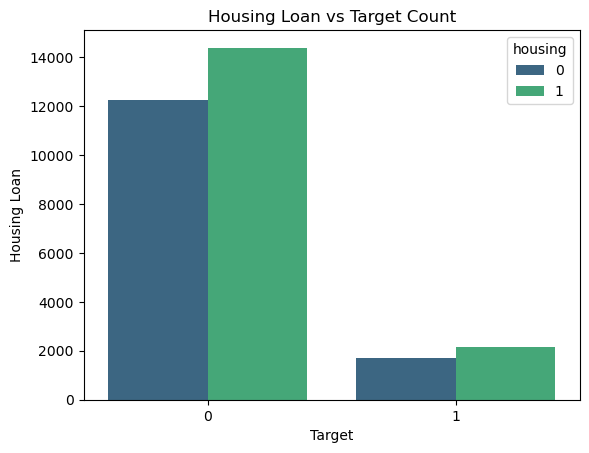

In [24]:
sns.countplot(x=dummy['y'], hue=dummy['housing'], palette='viridis')
plt.xlabel("Target")
plt.ylabel("Housing Loan")
plt.title("Housing Loan vs Target Count")
plt.show()

> here, 0 represents customer has not taken house loan <br>
1 represents customer has taken house loan <br>
2 represents where customer has taken loan or not is unknown

**Multivariate Analysis**

<p>
    It checks relationships between three or more variables simultaneously.
</p>

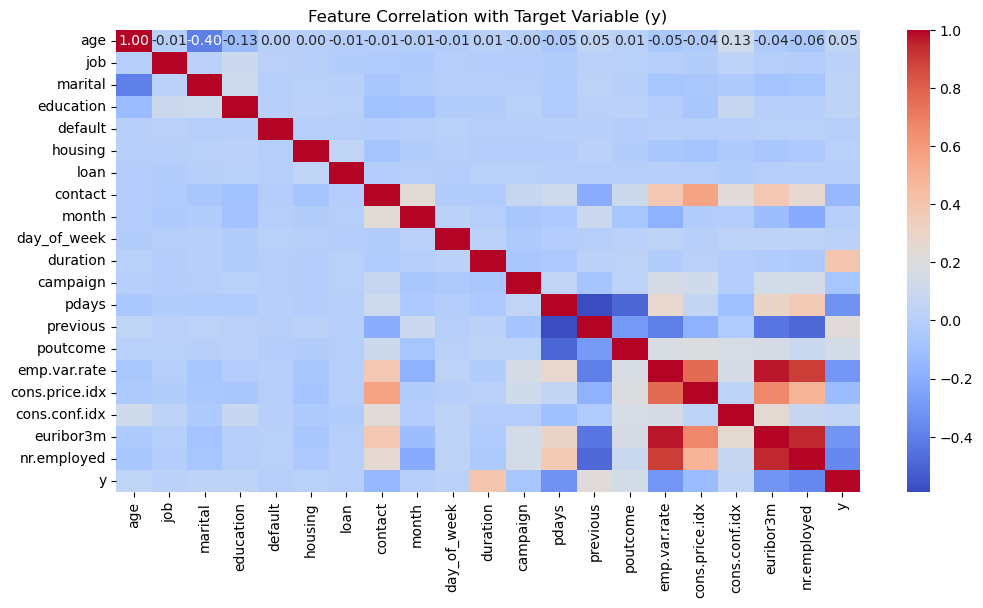

In [25]:
# Compute correlation
corr = df.corr()

# Plot heatmap
# to set the figure size
plt.figure(figsize=(12, 6))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation with Target Variable (y)")
plt.show()

> Features like poutcome, emp.var.rate, euribor3m, and nr.employed seem to have stronger relationships with y 

In [26]:
X = df.drop(columns='y')
y = df['y']

In [30]:
'''import numpy as np
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot Elbow Curve
plt.plot(range(1, 11), wcss, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.title("Elbow Method for Optimal k")
plt.show()'''


'import numpy as np\nfrom sklearn.cluster import KMeans\n\nwcss = []  # Within-cluster sum of squares\nfor k in range(1, 11):\n    kmeans = KMeans(n_clusters=k, random_state=42)\n    kmeans.fit(X)\n    wcss.append(kmeans.inertia_)\n\n# Plot Elbow Curve\nplt.plot(range(1, 11), wcss, marker=\'o\')\nplt.xlabel("Number of Clusters")\nplt.ylabel("WCSS")\nplt.title("Elbow Method for Optimal k")\nplt.show()'

In [31]:
'''from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

# Visualizing the clusters using two important features
sns.scatterplot(x=df['age'], y=df['duration'], hue=df['Cluster'], palette='viridis')
plt.xlabel("Age")
plt.ylabel("Call Duration")
plt.title("Clustering of Customers based on Age and Call Duration")
plt.show()'''

'from sklearn.cluster import KMeans\nkmeans = KMeans(n_clusters=3, random_state=42)\ndf[\'Cluster\'] = kmeans.fit_predict(X)\n\n# Visualizing the clusters using two important features\nsns.scatterplot(x=df[\'age\'], y=df[\'duration\'], hue=df[\'Cluster\'], palette=\'viridis\')\nplt.xlabel("Age")\nplt.ylabel("Call Duration")\nplt.title("Clustering of Customers based on Age and Call Duration")\nplt.show()'

**Feature Selection techniques**
<p>
    To determine which fatures are important to train the model
</p>

**Random Forest Feature Importance**

<p>
    It measures how much each feature contributes to reducing impurity.<br>
Features with higher importance scores have a stronger impact on the model’s decision-making.
</p>

In [34]:
from sklearn.ensemble import RandomForestClassifier

In [35]:
rf = RandomForestClassifier(n_estimators=100,random_state=42)

In [36]:
# data is fit to RandomForestClassifier
rf.fit(X,y)

RandomForestClassifier(random_state=42)

In [37]:
# fetaure importance is calculated and stored 
importance = pd.Series(rf.feature_importances_,index=X.columns).sort_values(ascending=True)
print(importance)

default           3.106858e-08
contact           1.104942e-02
loan              1.327775e-02
previous          1.406172e-02
month             1.893770e-02
housing           1.925750e-02
emp.var.rate      2.360632e-02
marital           2.369165e-02
cons.price.idx    2.391781e-02
cons.conf.idx     3.021758e-02
poutcome          3.028530e-02
pdays             3.533751e-02
education         3.924836e-02
day_of_week       4.281596e-02
campaign          4.381964e-02
job               4.802481e-02
nr.employed       6.216144e-02
age               9.367823e-02
euribor3m         1.119463e-01
duration          3.146649e-01
dtype: float64


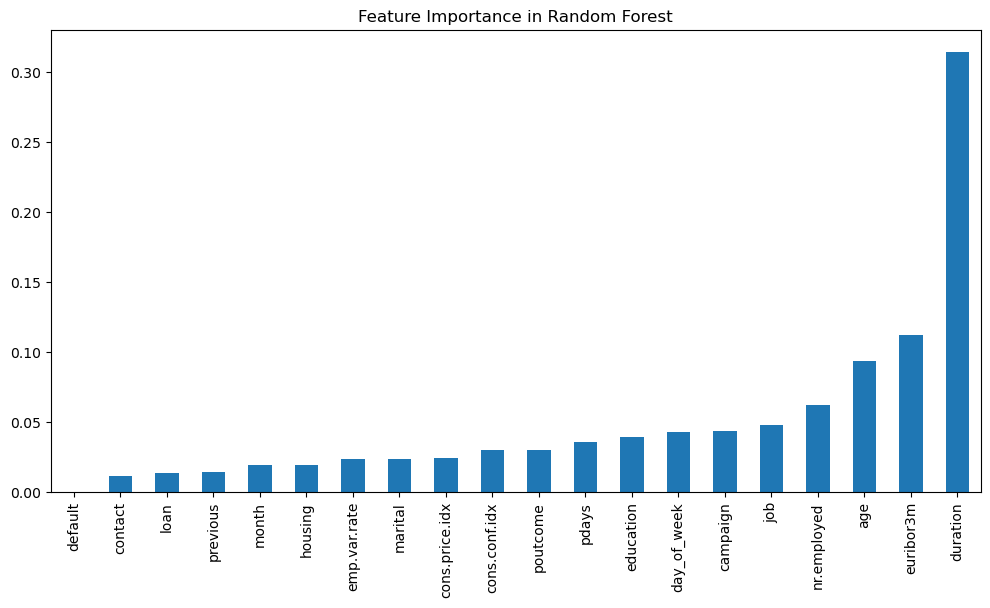

In [38]:
# Plot feature importance
importance.plot(kind="bar", figsize=(12, 6), title="Feature Importance in Random Forest")
plt.show()

**Using Recursive feature Elimination**

*It eliminates least important features one by one*

In [39]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=1000)
rfe = RFE(lr)
rfe.fit(X, y)

# Selected features
selected_features = X.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['education', 'housing', 'contact', 'day_of_week', 'campaign',
       'previous', 'poutcome', 'emp.var.rate', 'cons.conf.idx', 'euribor3m'],
      dtype='object')


>*By observing the output of Random Forest Feature Selection and Recursive Feature Selection the common features in both are taken and 'duration','euribor3m','age','nr.employed' are highly important in Random Forest Feature Selection but it's least important in RFE so these features are also considered*

In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()
selected_columns = ['duration','euribor3m','age','nr.employed','marital', 'default', 'contact', 'month', 'day_of_week', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx']
# applying standard scaling to selected columns and storing the result in a new dataframe
df_scaled = pd.DataFrame(scaler.fit_transform(df[selected_columns]), columns=selected_columns)

In [42]:
import joblib
joblib.dump(scaler,'bank-marketing-scaler.pkl')
print('Done')

Done


In [43]:
X = df_scaled

In [44]:
y = df['y']

**Balancing imbalance data**

_using oversampling SMOTE method_
> It is a artificially generated data that mimics as real data but it is not collected from actual observations

In [45]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled,y_resampled = smote.fit_resample(X,y)


In [46]:
# Tomek Links remove overlapping majority class samples, making the decision boundary clearer.
from imblearn.under_sampling import TomekLinks

tomek = TomekLinks()
X_final, y_final = tomek.fit_resample(X_resampled, y_resampled)

In [47]:
X = X_final
y = y_final

**Logistic Regression**
<p>
    Logistic Regression is a supervised machine learning algorithm used for classification problems.<br>
    It is commonly used when the target variable is binary
</p>

In [48]:
from sklearn.linear_model import LogisticRegression

In [49]:
log_reg = LogisticRegression()

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
# to split the data into training and testing
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [52]:
# hyperparameter tunning
param_grid = {
    'penalty':['l1','l2','elasticnet'],
    'max_iter':[100,200,300],
    'C':[1,2,3,4,5,6,7,8,9,10,20,30,40,50,60]
}

_I have used GridSearchCV to find best prameters to train the model_ <br>
it performs step by step checking each parameter

In [53]:
from sklearn.model_selection import GridSearchCV

In [54]:
grid_cv = GridSearchCV(log_reg,param_grid,scoring='accuracy',cv=5)

In [55]:
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 20, 30, 40, 50,
                               60],
                         'max_iter': [100, 200, 300],
                         'penalty': ['l1', 'l2', 'elasticnet']},
             scoring='accuracy')

In [56]:
# i have used penalty l2 because it is the best parameter after performing GridSearchCV
# l1 is lasso regression and l2 is ridge regression both are used to prevent from overfitting by adding weights
grid_cv.best_params_

{'C': 1, 'max_iter': 100, 'penalty': 'l2'}

In [57]:
best_params=grid_cv.best_params_

In [58]:
grid_cv.best_score_

0.8558806656423877

In [59]:
# training the model with best parameters which are given by GridSearchCV
log_reg_best = LogisticRegression(**best_params)

In [60]:
# fitting the training data to the model
log_reg.fit(X_train,y_train)

LogisticRegression()

In [61]:
# used to make predictions on test data
y_pred=log_reg.predict(X_test)
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.85      0.86      0.85      6505
           1       0.86      0.85      0.85      6663

    accuracy                           0.85     13168
   macro avg       0.85      0.85      0.85     13168
weighted avg       0.85      0.85      0.85     13168



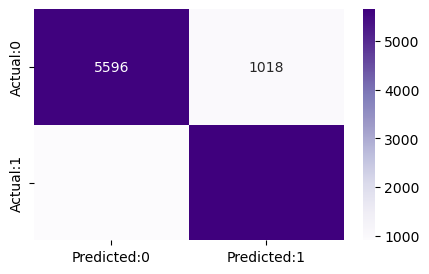

In [62]:
# plotting confusion matrix
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cmap='Purples')
plt.show()

Precision - Precision tells us how many of the predicted positive instances were actually correct.<br>
            *High Precision - Fewer false positives* <br>
Recall - Recall tells us how many of the actual positive instances were correctly identified.<br>
           *High Recall - Fewer false negatives* <br>
f1-score - F1-score balances Precision and Recall, making it useful when both false positives and false negatives matter.
           *High F1-score - A good balance between Precision and Recall.*

In [63]:
y_test1 = y_test.astype(int)  # Ensure y_test is int
y_pred1 = y_pred.astype(int)  # Convert y_pred from str to int


In [64]:
# calculating training , testing accuracy, recall,precision, f1-score
train_acc=log_reg.score(X_train,y_train)*100
test_acc=accuracy_score(y_test1,y_pred1)*100
recal=recall_score(y_test1,y_pred1)*100
prec=precision_score(y_test1,y_pred1)*100
f1=f1_score(y_test1,y_pred1)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 85.62098121614096
Testing Accuracy : 85.36603888213851
F1 Score : 85.42029204811983
Recall : 86.13060726274031
Precision : 84.72159687828305


**Support Vector Machine**

<p>
    Support Vector Machine is a supervised learning algorithm used for classification and regression tasks.<br>
    It tries to find best hyper plane which will separate the data.
</p>

In [65]:
from sklearn.svm import SVC

support_vector = SVC()

In [66]:
param_grid = {
    'C':[1,2,3,4,5,6,7,8,9,10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma':['scale','auto'],
    'max_iter':[100,200,300]
}

In [67]:
gridSearch = GridSearchCV(support_vector,param_grid,scoring='accuracy',cv=7)

In [68]:
gridSearch.fit(X_train,y_train)

GridSearchCV(cv=7, estimator=SVC(),
             param_grid={'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
                         'max_iter': [100, 200, 300]},
             scoring='accuracy')

In [69]:
best_params=gridSearch.best_params_

In [70]:
gridSearch.best_score_

0.6618899034412482

In [71]:
# fitting the best parameters to the svm 
svm_best = SVC(**best_params)

In [72]:
svm_best.fit(X_train,y_train)

SVC(C=3, kernel='sigmoid', max_iter=300)

In [73]:
# used to make predictions on test data
y_pred= svm_best.predict(X_test)

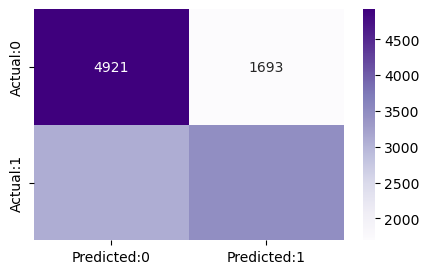

In [74]:
conf_matrix = pd.DataFrame(data = confusion_matrix(y_test,y_pred),
                           columns = ['Predicted:0', 'Predicted:1'],
                           index =['Actual:0', 'Actual:1'])
plt.figure(figsize = (5, 3))
sns.heatmap(conf_matrix, annot = True, fmt = 'd',cmap='Purples')
plt.show()

In [75]:
# classification report gives summary of the model. It is used as a performance metrics.
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.74      0.61      0.67      8002
           1       0.53      0.67      0.59      5166

    accuracy                           0.64     13168
   macro avg       0.64      0.64      0.63     13168
weighted avg       0.66      0.64      0.64     13168



In [76]:
y_test = y_test.astype(int)
y_pred = y_pred.astype(int)
train_acc=svm_best.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 63.670193914232186
Testing Accuracy : 63.745443499392465
F1 Score : 59.26621160409557
Recall : 52.99054012816601
Precision : 67.22802942315137


**K-Nearest Neighbor**

knn is used for both classification and regression.<br>
It is used to find nearest data point to the given input.<br>
classify it based on majority voting (in case of classification) and averaging their values (in case of regression).

In [77]:
from sklearn.neighbors import KNeighborsClassifier

In [78]:
knn = KNeighborsClassifier()

In [79]:
param_grid = {
    'n_neighbors':[1,2,3,4,5,6,7,8,9],
    'weights':['uniform', 'distance'],
    'algorithm':['auto','ball_tree','kd_tree','brute']
}

In [80]:
grid_cv = GridSearchCV(knn,param_grid,scoring='accuracy',cv=5)
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9],
                         'weights': ['uniform', 'distance']},
             scoring='accuracy')

In [81]:
best_params = grid_cv.best_params_

In [82]:
grid_cv.best_score_

0.9268643898625234

In [83]:
knn_best = KNeighborsClassifier(**best_params)

In [84]:
knn_best.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [85]:
# used to make predictions on test data
y_pred = knn_best.predict(X_test)
y_pred = y_pred.astype(int)  # Convert predictions to integers
y_test = y_test.astype(int)

In [86]:
train_acc=knn_best.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 99.99746848260848
Testing Accuracy : 94.03098420413123
F1 Score : 94.19068736141905
Recall : 97.22306988098872
Precision : 91.34174311926606


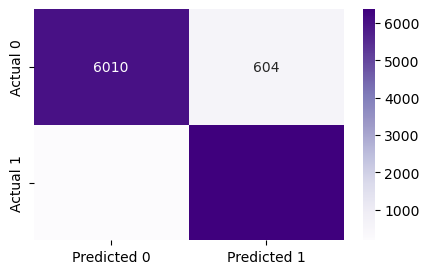

In [87]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,cmap='Purples',annot=True,fmt='d',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.show()

**Naive Bayes**

It is based on Baye's Theorem.
P(A∣B)= P(B∣A)×P(A) / P(B)

- GaussianNB <br>
It is a classifier which assumes data follows normal distribution.<br>
Used for continuous data

In [88]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train,y_train)

GaussianNB()

In [89]:
# used to make predictions on test data
y_pred=gnb.predict(X_test)
y_pred = y_pred.astype(int)  # Convert predictions to integers
y_test = y_test.astype(int)

In [90]:
train_acc=gnb.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 49.339273960812115
Testing Accuracy : 49.77217496962333
F1 Score : 66.4638474799716
Recall : 100.0
Precision : 49.77217496962333


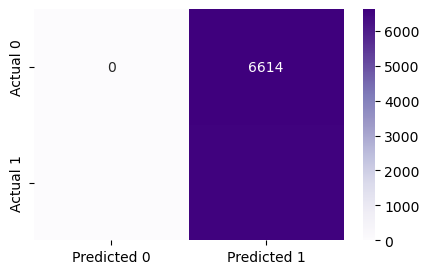

In [91]:
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,fmt='d',cmap='Purples',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.show()

**Decision Tree**

It works by splitting data into branches based on feature values, forming a tree-like structure.

In [92]:
from sklearn.tree import DecisionTreeClassifier

d_tree = DecisionTreeClassifier(max_depth=3)

In [93]:
# hyperparameter tunning
param_grid = {
    'criterion':['gini','entropy','log_loss'],
    'splitter':['best','random'],
    'max_depth':[3,4,5],
    'max_features':['auto','sqrt','log2']
}

In [94]:
# classifier, parameters, cross-validation,scoring parameter is passed to GridSearchCV
# scoring is evaluation metric
grid_cv = GridSearchCV(d_tree,param_grid,cv=5,scoring='accuracy')

In [95]:
# fitting training data to the grid search cv
grid_cv.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=3),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 4, 5],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [96]:
best_params=grid_cv.best_params_

In [97]:
# best parameters are passed to classifier
d_treeBest=DecisionTreeClassifier(**best_params)

In [98]:
# fitting training data to the classifier
d_treeBest.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, max_features='log2')

In [99]:
#from sklearn import tree
#plt.figure(figsize=(20,15))
#tree.plot_tree(d_treeBest,filled=True)

In [100]:
# used to make predictions on test data
y_pred = d_treeBest.predict(X_test)
y_pred = y_pred.astype(int)  # Convert predictions to integers
y_test = y_test.astype(int)

In [101]:
# calculating accuracy 
train_acc=gnb.score(X_train,y_train)*100
test_acc=accuracy_score(y_test,y_pred)*100
recal=recall_score(y_test,y_pred)*100
prec=precision_score(y_test,y_pred)*100
f1=f1_score(y_test,y_pred)*100
print("Training Accuracy :", train_acc)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recal)
print("Precision :", prec)

Training Accuracy : 49.339273960812115
Testing Accuracy : 77.42253948967192
F1 Score : 75.22293524460373
Recall : 68.85871223680195
Precision : 82.88337924701561


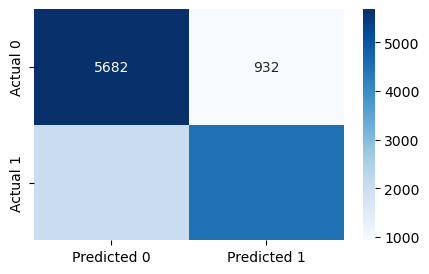

In [102]:
# plotting confusion matrix
conf_matrix = confusion_matrix(y_test,y_pred)
plt.figure(figsize=(5,3))
sns.heatmap(conf_matrix,annot=True,cmap='Blues',fmt='d',xticklabels=['Predicted 0','Predicted 1'],yticklabels=['Actual 0','Actual 1'])
plt.show()

> True Negatives (TN) = 9005 Model correctly predicted 0 when the actual class was 0.<br>
False Positives (FP) = 139 Model incorrectly predicted 1 when the actual class was 0.

**Random Forest Classifier**

It builds multiple decision tree and combines their output to improve accuracy.

In [103]:
from sklearn.ensemble import RandomForestClassifier

In [104]:
# optuna suggests hyperparameters for tunning 
import optuna
import warnings
warnings.filterwarnings('ignore')
import optuna.logging
optuna.logging.set_verbosity(optuna.logging.WARNING)
from sklearn.model_selection import cross_val_score

def objective(trial):
    criterion = trial.suggest_categorical('criterion', ['gini', 'entropy', 'log_loss']) # splitting criterion
    n_estimators = trial.suggest_int('n_estimators', 10,100,step=10) # no of trees
    max_depth = trial.suggest_int('max_depth', 5, 10, step=2) # maximum depth of tree
    min_samples_split = trial.suggest_int('min_samples_split', 2, 10) # minimum samples required to split node
    min_samples_leaf = trial.suggest_int('min_samples_leaf', 1, 4) # minimum samples required to split leaf
    max_features = trial.suggest_categorical('max_features', ['sqrt', 'log2']) # no of features
# train the model using defined parameters
    rfc = RandomForestClassifier(
        criterion=criterion,
        n_estimators=n_estimators,
        max_depth=max_depth,
        min_samples_split=min_samples_split,
        min_samples_leaf=min_samples_leaf,
        max_features=max_features,
        random_state=42
    )
# evaluates performance using cross-validation score
    score = cross_val_score(rfc, X_train, y_train, cv=5, scoring='accuracy').mean()
    return score
# Creates an Optuna study to maximize accuracy.
study = optuna.create_study(direction='maximize')
# Runs 20 trials, each testing different hyperparameter combinations.
study.optimize(objective, n_trials=20)

print("Best Parameters:", study.best_trial.params)

Best Parameters: {'criterion': 'gini', 'n_estimators': 70, 'max_depth': 9, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt'}


In [105]:
best_params = study.best_trial.params

In [106]:
# best parameters are passed to classifier
rfc_best = RandomForestClassifier(**best_params)

In [107]:
# fitting training data to the RandomForestClassifier
rfc_best.fit(X_train,y_train)

RandomForestClassifier(max_depth=9, min_samples_split=5, n_estimators=70)

In [108]:
# used to make predictions on test data
y_pred = rfc_best.predict(X_test)
y_pred = y_pred.astype(int)
y_test = y_test.astype(int)

In [109]:
# accuracy is calculated and stored
train_accuracy = rfc_best.score(X_train,y_train)*100
test_acc = accuracy_score(y_test,y_pred)*100
recall = recall_score(y_test,y_pred)*100
f1 = f1_score(y_test,y_pred)*100
precision = precision_score(y_test,y_pred)*100
print('Training Accuracy: ', train_accuracy)
print("Testing Accuracy :", test_acc)
print("F1 Score :", f1)
print("Recall :", recall)
print("Precision :", precision)

Training Accuracy:  91.26626499924055
Testing Accuracy : 90.37818955042528
F1 Score : 90.77673436703793
Recall : 95.13274336283186
Precision : 86.80217179451482


**Comparision between all model's accuracy**

In [110]:
# training and testing score of each model is given 
training_accuracy_score = {
    "Logistic Regression": 86.5912941003167,
    "SVM": 68.83700375635266,
    "Naive Bayes": 76.16557413272446,
    "Decision Tree": 76.16557413272446,
    "Random Forest": 91.31803785814245,
    "KNN": 100.0
}

testing_accuracy_score = {
    "Logistic Regression": 86.78119648677016,
    "SVM": 69.40286140418715,
    "Naive Bayes": 76.09788432856432,
    "Decision Tree": 87.30597138595813,
    "Random Forest": 91.11749433795504,
    "KNN": 94.22747610893222
}


In [111]:
# key and value pairs are assigned to variable
models = list(training_accuracy_score.keys())
scores = list(training_accuracy_score.values())

test_models = list(testing_accuracy_score.keys())
test_scores = list(testing_accuracy_score.values())

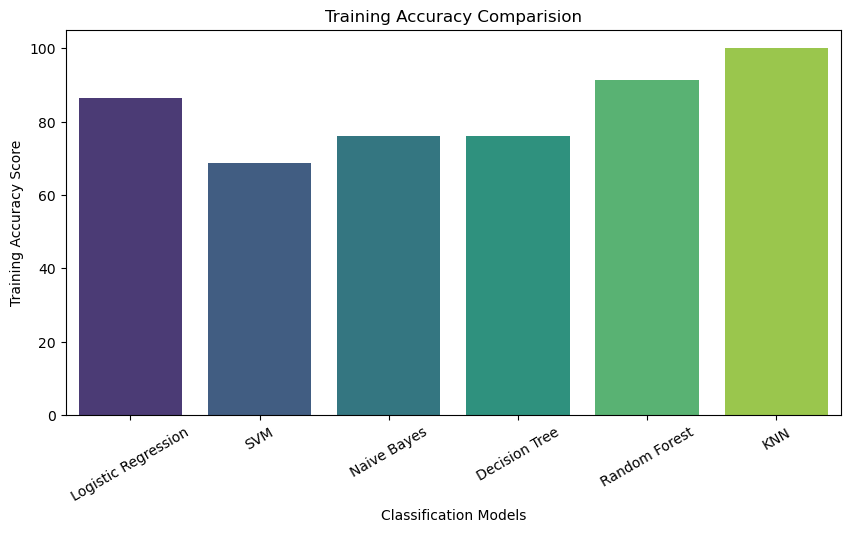

In [112]:
# plotting training accuracy of each model
plt.figure(figsize=(10,5))
sns.barplot(x=models,y=scores,palette='viridis')
plt.xlabel('Classification Models')
plt.ylabel('Training Accuracy Score')
plt.title('Training Accuracy Comparision')
plt.xticks(rotation=30)
plt.show()

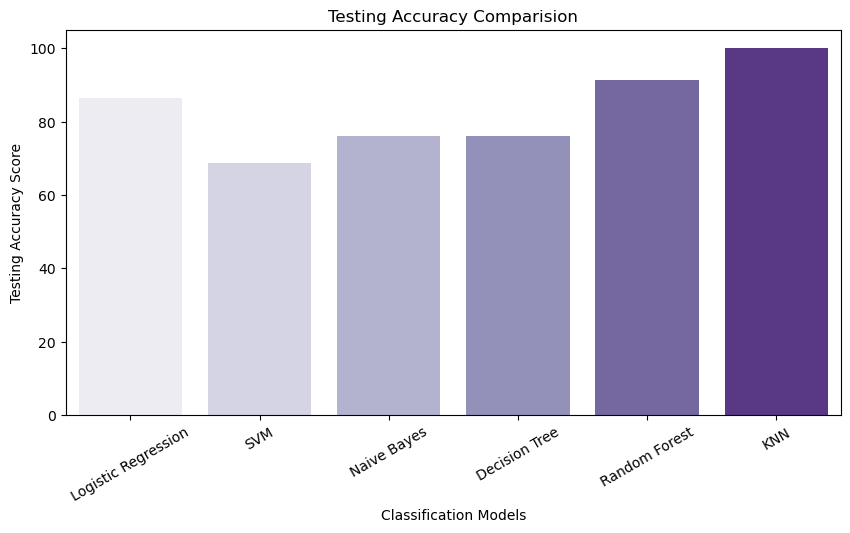

In [113]:
# plotting testing accuracy of each model
plt.figure(figsize=(10,5))
sns.barplot(x=models,y=scores,palette='Purples')
plt.xlabel('Classification Models')
plt.ylabel('Testing Accuracy Score')
plt.title('Testing Accuracy Comparision')
plt.xticks(rotation=30)
plt.show()

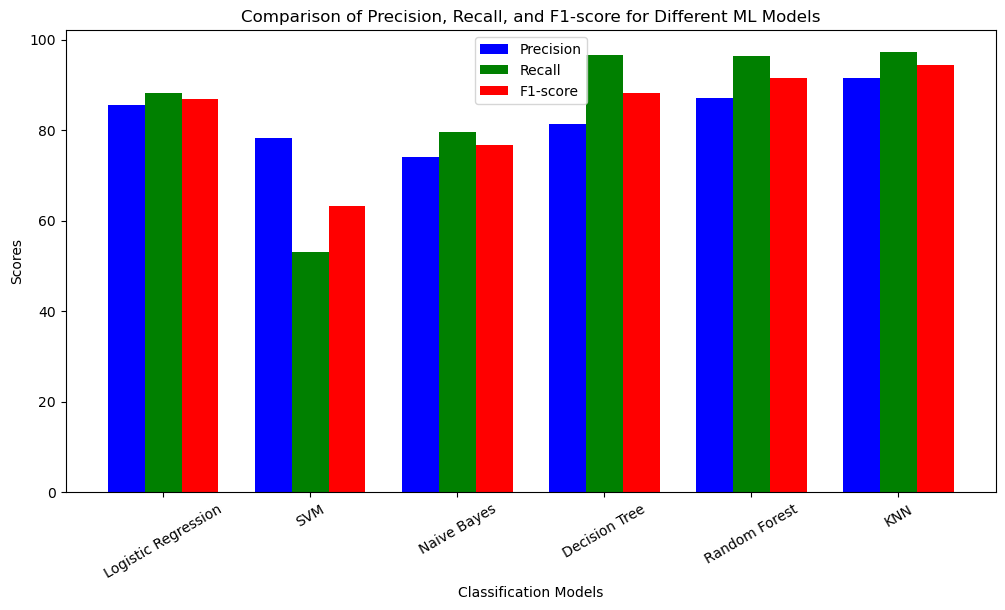

In [114]:
# numpy is python library used for data analysis
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# store Precision, Recall, and F1-score for each model
metrics = {
    "Logistic Regression": {"Precision": 85.6152512998267, "Recall": 88.12576652915598, "F1-score": 86.85237074885997},
    "SVM": {"Precision": 78.25370675453048, "Recall": 52.96019623146393, "F1-score": 63.169093689740016},
    "Naive Bayes": {"Precision": 74.14689970869746, "Recall": 79.4625933771881, "F1-score": 76.71277111027393},
    "Decision Tree": {"Precision": 81.30455185358987, "Recall": 96.58824841119412, "F1-score": 88.28984916428863},
    "Random Forest": {"Precision": 87.03088841935809, "Recall": 96.44330471624485, "F1-score": 91.49566321133912},
    "KNN": {"Precision": 91.61764705882352, "Recall": 97.24606979596388, "F1-score": 94.34799069717128}
}

# Converting the metrics in separate lists
models = list(metrics.keys())
precision_scores = [metrics[m]["Precision"] for m in models]
recall_scores = [metrics[m]["Recall"] for m in models]
f1_scores = [metrics[m]["F1-score"] for m in models]

# width of the bars
bar_width = 0.25
x = np.arange(len(models))
# plotting the grouped bar chart
plt.figure(figsize=(12, 6))
plt.bar(x - bar_width, precision_scores, width=bar_width, label='Precision', color='blue')
plt.bar(x, recall_scores, width=bar_width, label='Recall', color='green')
plt.bar(x + bar_width, f1_scores, width=bar_width, label='F1-score', color='red')

# Formatting the plot
plt.xticks(ticks=x, labels=models, rotation=30)
plt.xlabel("Classification Models")
plt.ylabel("Scores")
plt.title("Comparison of Precision, Recall, and F1-score for Different ML Models")
plt.legend()
plt.show()


> __*Evaluating the Best Model Based on Results*__

>>*Random Forest is best model because <br>
Training Accuracy: 91.31%
Testing Accuracy: 91.11%
F1-score: 91.49
Recall: 96.44
Precision: 87.03 <br>
By considering this score RandomsForestTree Classifier is best*

In [115]:
import joblib
joblib.dump(rfc_best,'bank-marketing.pkl')
print('Done')

Done


In [116]:
joblib.dump(scaler,'bank-marketing-scaler.pkl')
print('Done')

Done


In [117]:
print(rfc_best.predict([[461, 4.857, 45, 0, 1, 0, 1, 4, 1, 999, 0, 1.10, 93.99, -36.40]]))


['1']


In [62]:
print(scaler)

StandardScaler()
